<a href="https://colab.research.google.com/github/Vlad-Shapar/machine-learning/blob/main/%D0%A8%D0%B0%D0%BF%D0%B0%D1%80%D1%8C_%D0%BF%D1%80_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''ЗАВДАННЯ 1. Побудувати звичайну багатошарову нейронну мережу для датасету fashion
mnist 1. Завантажити датасет'''
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os

#  Завантажити датасет Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


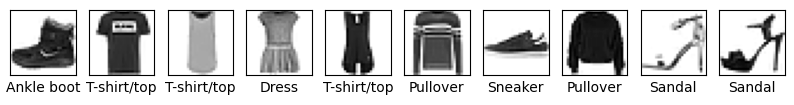

In [2]:
'''2. Роздрукувати 10 зображень.'''
# Імена класів
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#  Роздрукувати 10 зображень
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



In [3]:
'''3. Підготовувати дані, побудувати архітектуру.'''
#  Підготовка даних (нормалізація)
train_images = train_images / 255.0
test_images = test_images / 255.0

#  Побудова архітектури моделі
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Розгортання зображень у вектор
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Вихідний шар для 10 класів
])

# Компіляція моделі
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Виведення архітектури моделі
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
'''4. Використати ранню зупинку і зменшення швидкості для запобіганню
перенавчанню.'''
'''5. Вивести архітектуру моделі.'''
#  Використання ранньої зупинки та зменшення швидкості навчання
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

#  Навчання моделі
history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.7834 - loss: 0.5979 - val_accuracy: 0.8577 - val_loss: 0.3989 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8636 - loss: 0.3718 - val_accuracy: 0.8430 - val_loss: 0.4031 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - accuracy: 0.8800 - loss: 0.3298 - val_accuracy: 0.8664 - val_loss: 0.3601 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8885 - loss: 0.3014 - val_accuracy: 0.8749 - val_loss: 0.3515 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.8953 - loss: 0.2786 - val_accuracy: 0.8734 - val_loss: 0.3579 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8961 - loss: 0.2721 - val_accuracy: 0.8754 - val_loss: 0.3426 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accura

In [5]:
'''6. Зберегти модель на гугл диск.'''
# Збереження моделі на Google Диск
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/fashion_mnist_model.h5')


Mounted at /content/drive


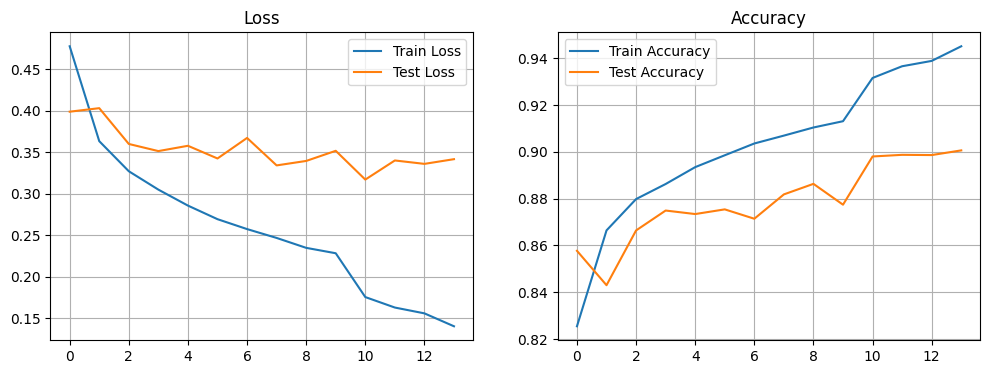

In [6]:
'''7. Побудувати графіки функції втрат і точності для тренувальних і
тестових даних'''
#  Побудова графіків функції втрат і точності
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

In [7]:
'''8. Вивести класифікаційний звіт.'''
# 9. Виведення класифікаційного звіту
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
predictions = model.predict(test_images)

# Перетворюємо прогнози в мітки
predicted_labels = np.argmax(predictions, axis=1)

# Виведення класифікаційного звіту
print(classification_report(test_labels, predicted_labels, target_names=class_names))


313/313 - 2s - 7ms/step - accuracy: 0.8980 - loss: 0.3172
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.87      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.81      0.81      0.81      1000
       Dress       0.91      0.90      0.90      1000
        Coat       0.80      0.84      0.82      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.74      0.70      0.72      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



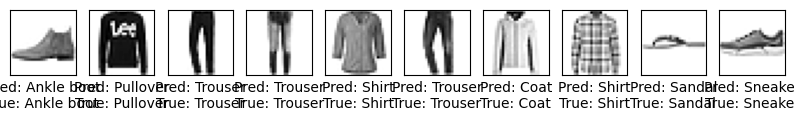

In [8]:
'''9. Результати розпізнавання із прогнозованим і справжнім класом'''
# 10. Результати розпізнавання із прогнозованим і справжнім класом
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[test_labels[i]]}")
plt.show()

In [9]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [10]:
'''Завдання 2
Побудувати нейронну мережу, аналогічну завданню 1 для датасета fashion
mnist'''
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from kerastuner.tuners import RandomSearch

# Завантаження набору даних Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

x_train = x_train / 255.0
x_test = x_test / 255.0

<ipython-input-10-b8060781705b>:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


x_train original shape (60000, 28, 28)
y_train original shape (60000,)


In [12]:
'''Використати Keras Tuner підбору гіперпараметрів моделі.'''
def build_model(hp):
    model = keras.Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    # Додавання шарів, які будуть тюнуватися
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                     min_value=32,
                                     max_value=512,
                                     step=32),
                        activation='relu',
                        kernel_regularizer=l2(0.001)))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

    model.add(Dense(10, activation='softmax'))

    # Компіляція моделі з оптимізатором, який також буде тюнуватися
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # збільшення кількості спроб для кращих результатів
    executions_per_trial=1,
    directory='tuner_logs',
    project_name='fashion_mnist_classification'
)

# Визначення ранньої зупинки та зниження швидкості навчання
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

tuner.search(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr])

# Отримання найкращої моделі
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

# Тренування та оцінка моделі
best_model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr])

test_loss, test_acc = best_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


Trial 5 Complete [00h 23m 54s]
val_accuracy: 0.8896999955177307

Best val_accuracy So Far: 0.8896999955177307
Total elapsed time: 01h 40m 07s

Search: Running Trial #6

Value             |Best Value So Far |Hyperparameter
3                 |3                 |num_layers
320               |320               |units_0
0.001             |0.001             |learning_rate
512               |160               |units_1
128               |288               |units_2
480               |224               |units_3

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.7402 - loss: 1.5994 - val_accuracy: 0.7968 - val_loss: 0.9558 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8072 - loss: 0.8682 - val_accuracy: 0.8040 - val_loss: 0.7275 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8133 - loss: 0.7249 - val_accuracy: 0.8102 - val_loss: 0.6981 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━

KeyboardInterrupt: 

In [ ]:
'''
Порівняння результатів нейронних мереж для датасету Fashion MNIST у Завданні 1 і
Завданні 2 показує, що модель із Завдання 1 мала точність на тестовому наборі
89.8%, тоді як у Завданні 2, з використанням Keras Tuner для підбору
гіперпараметрів, максимальна валідаційна точність досягла 88.97%. Це свідчить
про те, що перша модель була трохи точнішою на тестових даних. Функція втрат у
Завданні 1 складала 0.3172 на тестових даних, а в Завданні 2 цей показник не
вказаний, проте можна припустити, що втрати були на схожому рівні, зважаючи
на схожу точність моделей. Класифікаційні метрики у Завданні 1 показали загальну
точність 0.90 для всіх класів, де більшість класів мали високі значення
precision і recall, наприклад, клас "Sandal" із precision 0.99 та recall 0.97.
Однак деякі класи, такі як "Shirt", мали гірші показники, що вказує на труднощі
у розпізнаванні зображень певних категорій. У Завданні 2 конкретні метрики для
кожного класу не наведені, але загальна точність була трохи нижчою. Хоч у
Завданні 2 був використаний Keras Tuner для автоматичного підбору
гіперпараметрів, що дозволило оптимізувати архітектуру моделі, вона не змогла
перевершити точність першої моделі. Це може свідчити про те, що автоматичний
підбір гіперпараметрів не завжди гарантує кращі результати, і що підхід із
вручну налаштованою моделлю в деяких випадках може бути більш ефективним.
'''

In [ ]:
'''
У ході лабораторної роботи було розроблено дві нейронні мережі для розпізнавання
зображень із датасету Fashion MNIST. У першому завданні ми побудували
багатошарову нейронну мережу з використанням класичних методів налаштування
архітектури. Модель показала точність 89.8% на тестових даних, що є хорошим
результатом. У другому завданні було використано Keras Tuner для автоматичного
підбору гіперпараметрів. Проте, незважаючи на оптимізацію, точність валідації
досягла лише 88.97%, що свідчить про те, що класичний підхід може бути
ефективнішим в окремих випадках. З цього випливає, що автоматичний підбір
гіперпараметрів не завжди гарантує кращий результат і важливо вручну
налаштовувати модель, орієнтуючись на специфіку задачі.
'''